<a href="https://colab.research.google.com/github/shreesalkani/Playstore-Analysis-Project/blob/main/Playstore_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv(r'/content/drive/MyDrive/playstore-analysis (2) (1).csv')
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


# 1.Data Cleanning – Missing value treatment

a-->Drop records where rating is missing since rating is our target/study variable

In [7]:
print(f"Missing Values :\n{df.isnull().sum()}")

Missing Values :
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [5]:
df1=df.dropna(subset=['Rating'])

In [9]:
print(f"Missing Values :\n{df1.isnull().sum()}")

Missing Values :
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64


b-Check the null values for the Android Ver column.

In [10]:

print(f"Missing Values :\n{df1['Android Ver'].isnull().sum()}")

Missing Values :
3


In [6]:
print (df1[df1.isna().any(axis=1)])

                                           App  ... Android Ver
15             Learn To Draw Kawaii Characters  ...  4.2 and up
1553                      Market Update Helper  ...  1.5 and up
4453                    [substratum] Vacuum: P  ...         NaN
4490                      Pi Dark [substratum]  ...         NaN
6322                    Virtual DJ Sound Mixer  ...  4.0 and up
7333                               Dots puzzle  ...  4.0 and up
10472  Life Made WI-Fi Touchscreen Photo Frame  ...         NaN

[7 rows x 13 columns]


In [7]:
df2 = df1.drop(10472)
# Verification
verify = df2[df2["App"]=='Life Made WI-Fi Touchscreen Photo Frame']
print (verify)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [8]:
import statistics
Android_list = df2['Android Ver'].to_list()
# print(Android_list)
# O/P ['4.2 and up', '1.5 and up', nan, nan, '4.0 and up', '4.0 and up']

# Did Manual work(illegal)
Al=[4.2,1.5,4.0,4.0]
# print(Al)
# print(statistics.mode(Al))
df2_new = df2.fillna(statistics.mode(Al))

print(df2_new.loc[[4453]])
print('--------------------------------------------------------------------')
print(df2_new.loc[[4490]])

                         App         Category  ...  Current Ver Android Ver
4453  [substratum] Vacuum: P  PERSONALIZATION  ...          4.4           4

[1 rows x 13 columns]
--------------------------------------------------------------------
                       App         Category  ...  Current Ver Android Ver
4490  Pi Dark [substratum]  PERSONALIZATION  ...          1.1           4

[1 rows x 13 columns]


c. Current ver – replace with most common value

In [9]:
print(f"Missing Values :{df2_new['Current Ver'].isnull().sum()}")

Missing Values :0


# 2. Data clean up – correcting the data types

a. Which all variables need to be brought to numeric types?

In [10]:
df2_new['Reviews'] = df2_new['Reviews'].astype(int)
df2_new['Size'] = df2_new['Size'].astype(int)
# Additional conversion
df2_new['Last Updated'] = df2_new['Last Updated'].astype('datetime64[ns]')


b. Price variable – remove $ sign and convert to float

In [11]:
df2_new['Price'] = df2_new['Price'].str.replace('$', '')

In [12]:
df2_new.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [13]:
df2_new['Price'] = df2_new['Price'].astype(float)

In [14]:
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int64         
 4   Size            9366 non-null   int64         
 5   Installs        9366 non-null   object        
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 1.3+ MB


c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [15]:
df2_new['Installs'] = df2_new['Installs'].str.replace('+','')

In [16]:
df2_new['Installs'] = df2_new['Installs'].str.replace(',', '')

In [17]:
df2_new['Installs'] = df2_new['Installs'].astype(int)

In [18]:
df2_new.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [19]:
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int64         
 4   Size            9366 non-null   int64         
 5   Installs        9366 non-null   int64         
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 1.3+ MB


# 3. Sanity checks – check for the following and handle accordingly

a. Avg. rating should be between 1 and 5, as only these values are allowed on the play
store.

In [21]:
pd.unique(df2_new[['Rating']].values.ravel())
#.ravel()-->return 1D array with all the input-array elements

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

b. Reviews should not be more than installs as only those who installed can review the
app.

In [22]:
df3 = pd.DataFrame()
df3 = df2_new[df2_new.Reviews <= df2_new.Installs]
df3.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [23]:
df3.shape

(9359, 13)

# 4. Identify and handle outliers –

a. Price column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


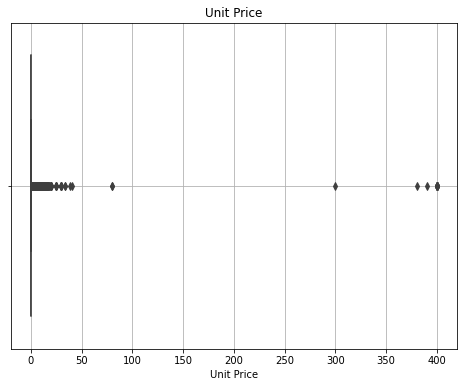

In [25]:
plt.subplots(figsize=(8,6))
sns.boxplot(df3.Price)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid(linestyle='-')
plt.show()

In [26]:
rslt_df = df2_new[df2_new['Price'] == 200]
print(rslt_df)
# old data analysis (before data cleanning)
# rslt_df = data[data['Price'] == '$200.00']
# print(rslt_df)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


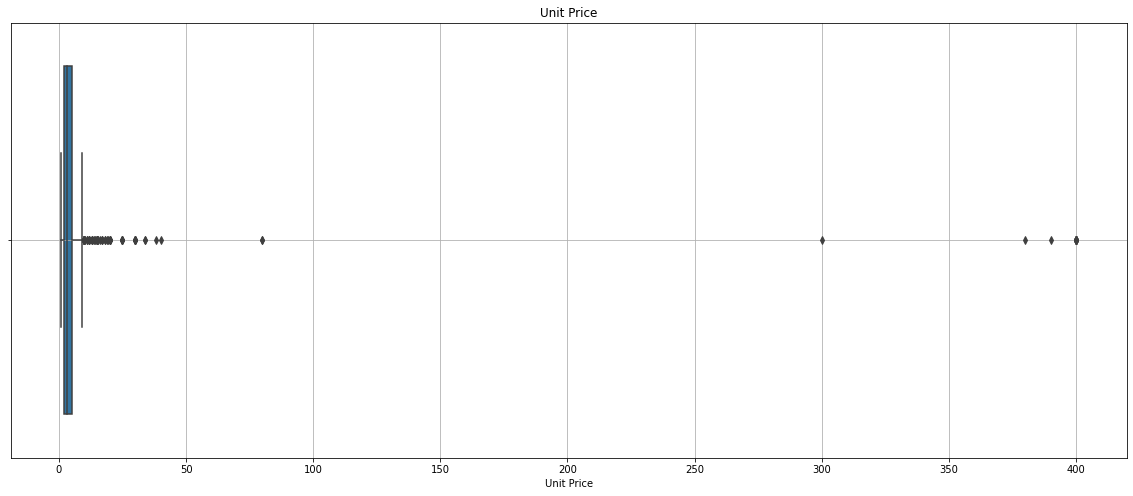

In [27]:
usful_df = df3[df3['Price'] != 0]
# usful_df
plt.subplots(figsize=(20,8))
sns.boxplot(usful_df.Price)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid()
plt.show()

In [28]:
limit_data = df3[df3['Price'] < 30]
limit_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [29]:
limit_data.shape

(9338, 13)

b. Reviews column

Category
GAME                   1585419555
COMMUNICATION           815461799
SOCIAL                  621241071
FAMILY                  410223081
TOOLS                   273184168
PHOTOGRAPHY             213516607
SHOPPING                115041033
PRODUCTIVITY            114116717
VIDEO_PLAYERS           110379692
PERSONALIZATION          89345815
SPORTS                   70829568
TRAVEL_AND_LOCAL         62617772
ENTERTAINMENT            59178154
NEWS_AND_MAGAZINES       54399899
EDUCATION                39595010
HEALTH_AND_FITNESS       37893622
MAPS_AND_NAVIGATION      30659060
BOOKS_AND_REFERENCE      21958660
FINANCE                  17550406
WEATHER                  14604695
BUSINESS                 13954086
LIFESTYLE                12871520
FOOD_AND_DRINK            8883009
DATING                    7291039
HOUSE_AND_HOME            3976004
COMICS                    3381945
ART_AND_DESIGN            1714372
MEDICAL                   1585618
AUTO_AND_VEHICLES         1163630
LIBRA

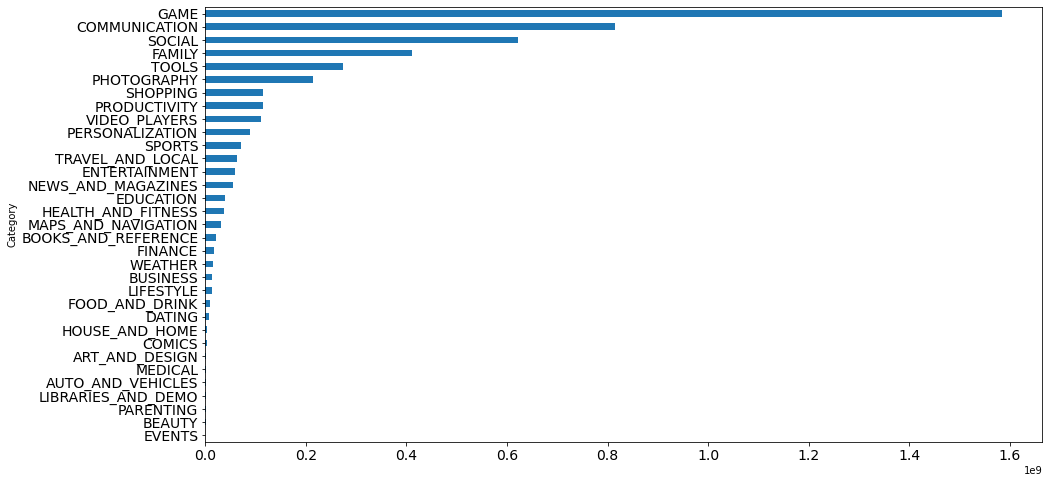

In [30]:
total=df3.groupby('Category')['Reviews'].sum().sort_values()
plt.subplots(figsize=(15,8))
total.plot(kind='barh', fontsize=14)
print(total.sort_values(ascending=False))
plt.show()


In [31]:
limit_data_by_review = df3[df3['Reviews'] < 1000000]
limit_data_by_review.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [32]:
limit_data_by_review.shape

(8655, 13)

c. Installs

In [33]:
val = df3.Installs.quantile(0.95) # 95th percentile
print(val)

100000000.0


In [34]:
# Verification
x = df3.Installs.quantile() > val
print (x)

False


# Data analysis to answer business questions

5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower
values?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


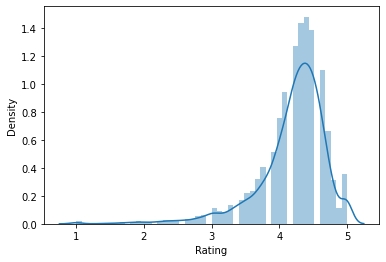

In [35]:
sns.distplot(df3['Rating'])
plt.show()

![image.png](attachment:image.png)

b. What is the implication of this on your analysis?

6. What are the top Content Rating values?

In [36]:
df3['Content Rating'].value_counts()

Everyone           7414
Teen               1083
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [37]:
Adult_rating = df3[df3['Content Rating'] == 'Adults only 18+'].index.to_list()
unrated =df3[df3['Content Rating'] == 'Unrated'].index.to_list()
df3.drop(Adult_rating, inplace = True)
df3.drop(unrated, inplace = True)
df3['Content Rating'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Everyone        7414
Teen            1083
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

In [38]:
# Pie Diagram
import plotly.graph_objects as go

fig = go.Figure(go.Pie(
    name = "Pie plot",
    values = [7414,1083,461,397],
    labels = ['Everyone','Teen','Mature 17+','Everyone 10+'],
))
fig.show()

7. Effect of size on rating

a.Make a joinplot to understand the effect of size on rating

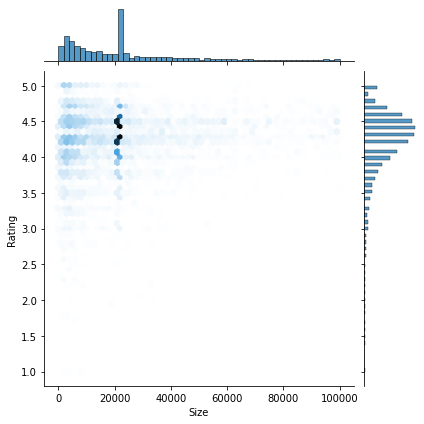

In [40]:
sns.jointplot(x=df3['Size'],y=df3['Rating'],data=df3,kind='hex')
plt.show()

b. Do you see any patterns?
c. How do you explain the pattern?

8. Effect of price on rating

a. Make a jointplot (with regression line)

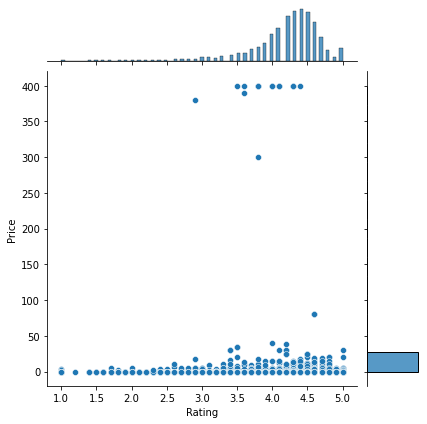

In [42]:
sns.jointplot(x ="Rating" , y = "Price" ,data = df3)
plt.show()

b. What pattern do you see?

c. How do you explain the pattern?

d. Replot the data, this time with only records with price > 0

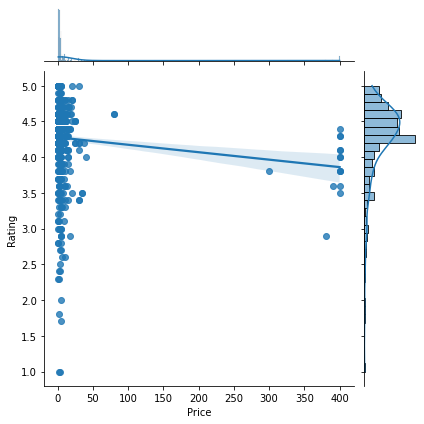

In [43]:
Price_greaterthan_zero = df3[df3['Price'] > 0]
sns.jointplot(x ="Price" , y = "Rating" ,data = Price_greaterthan_zero, kind = "reg" )
plt.show()

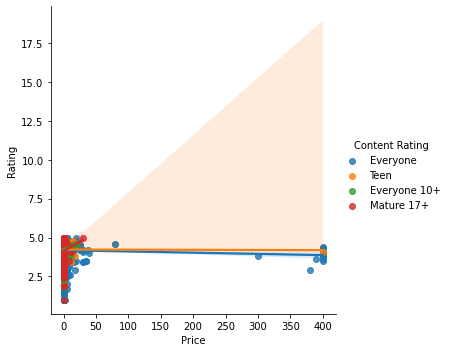

In [44]:
sns.lmplot(x='Price', y='Rating', hue ='Content Rating', data=df3)
plt.show()

9. Look at all the numeric interactions together –
a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

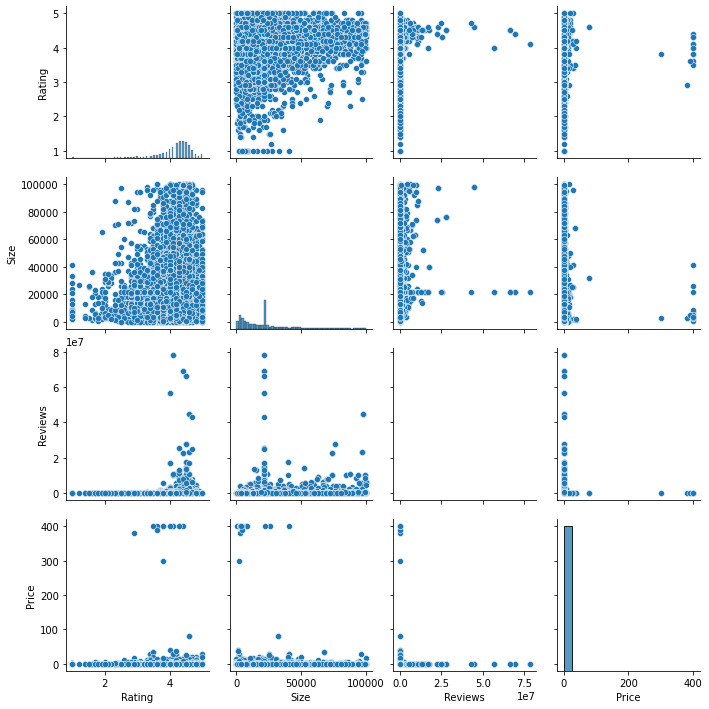

In [45]:
sns.pairplot(df3,vars=['Rating','Size', 'Reviews', 'Price'])
plt.show()

10. Rating vs. content rating

a. Make a bar plot displaying the rating for each content rating

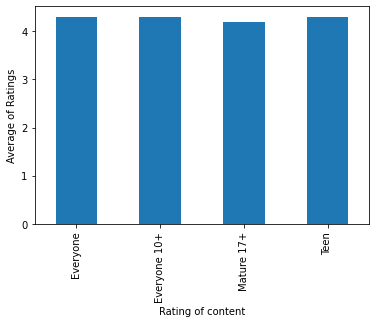

In [46]:
a = df3['Rating'].groupby(df3['Content Rating']).median().plot(kind = 'bar')
a.set(xlabel ='Rating of content', ylabel = 'Average of Ratings')
plt.show()

b. Which metric would you use? Mean? Median? Some other quantile?

c. Choose the right metric and plot

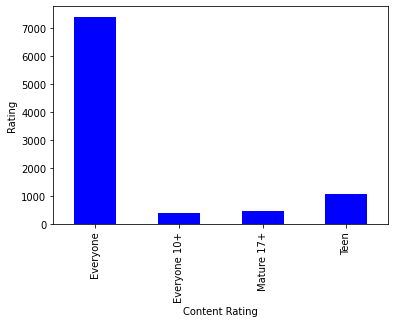

In [47]:
df3.groupby(['Content Rating'])['Rating'].count().plot.bar(color="b")
plt.ylabel('Rating')
plt.show()

11. Content rating vs. size vs. rating – 3 variables at a time

a. Create 5 buckets (20% records in each) based on Size

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



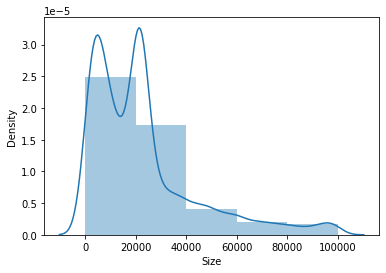

In [48]:
#Checking skewness
sns.distplot(df3["Size"], bins=5)
plt.show()

In [49]:
bins=[0, 4600, 12000, 21516, 32000, 100000]
df3['Size_Buckets'] = pd.cut(df3['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])
pd.pivot_table(df3, values='Rating', index='Size_Buckets', columns='Content Rating')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,4.116056,4.188889,3.951429,4.224490
LOW,4.161317,4.207143,4.129592,4.209655
MED,4.242463,4.262602,4.091975,4.205630
HIGH,4.179122,4.209375,4.168333,4.213158
VERY HIGH,4.208134,4.287805,4.197170,4.279603


b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each
combination

In [50]:
df3.Size.quantile([0.2, 0.4,0.6,0.8])

0.2     5100.0
0.4    14000.0
0.6    21516.0
0.8    34000.0
Name: Size, dtype: float64

In [51]:
df3.Rating.quantile([0.2, 0.4,0.6,0.8])

0.2    3.9
0.4    4.2
0.6    4.4
0.8    4.6
Name: Rating, dtype: float64

c. Make a heatmap of this

i. Annotated

ii. Greens color map

In [52]:
Size_Buckets =pd.pivot_table(df3, values='Rating', index='Size_Buckets', columns='Content Rating', 
                     aggfunc=lambda x:np.quantile(x,0.2))
Size_Buckets

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,3.8,3.84,3.28,3.90
LOW,3.8,3.94,3.64,3.88
MED,4.0,4.10,3.90,3.90
HIGH,3.9,4.00,3.90,4.00
VERY HIGH,3.9,4.10,4.00,4.00


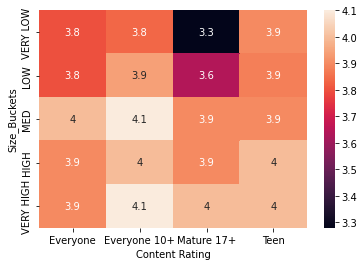

In [53]:
sns.heatmap(Size_Buckets, annot = True)
plt.show()

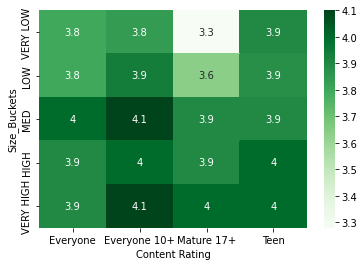

In [54]:
sns.heatmap(Size_Buckets, annot=True, cmap='Greens')
plt.show()

d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

In [ ]:
'''Yes, most of havier apps seems to be more preferred in all the Content Ratings. But, not to a big variations in it.
Except, Mature 17+ where low size apps arent preferred to a greater variation.
Apps which are in larger storage size are choosen for all types of content rating,but that number is adequate not huge.
Although on the otherhand when it comes to Mature 17+ category which are in less storage size, the number game is weak w.r.t rating as they are less preferred.

